In [4]:
# import all the libraries 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

this image is :  <class 'numpy.ndarray'>  with dimensions: (540, 960)


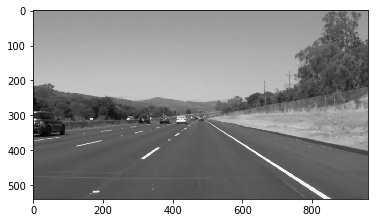

In [5]:
# read the image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#print the image type and dimensions
print("this image is : ",type(gray)," with dimensions:",gray.shape)
plt.imshow(gray,cmap='gray')

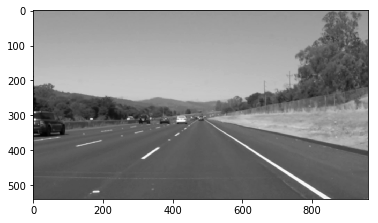

In [6]:
#apply gaussian smoothning
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
plt.imshow(blur_gray,cmap = 'gray')

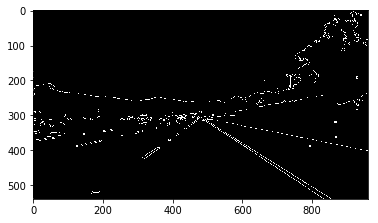

In [7]:
# apply canny algorithm to detect high strength pixels
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray,low_threshold,high_threshold)
plt.imshow(edges,cmap = 'Greys_r')

In [16]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255   
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap="Greys_r")

NameError: name 'red' is not defined

In [9]:
# hough transformation to detect the lines
rho=2
theta=np.pi/180
threshold = 65
min_line_length = 45
max_line_gap = 0.6
line_image= np.copy(image)*0


In [10]:
lines = cv2.HoughLinesP(masked_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

In [11]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)


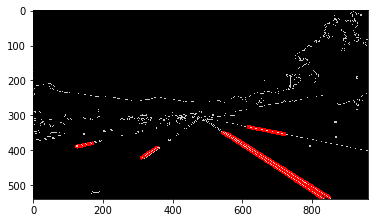

In [13]:
color_edges = np.dstack((edges,edges,edges))

combo = cv2.addWeighted(color_edges,0.8,line_image,1,0)
plt.imshow(combo)